In [1]:
import os 
os.listdir('./data')

['dataset_categorical',
 'dataset_for_cnn_model',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'train.csv',
 'train_FeatureSelected.csv',
 'train_spec_checked_and_add_target(full).csv']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
from tqdm.notebook import tqdm
from math import sqrt
import joblib
from sklearn.metrics import f1_score

# load data

In [3]:
'''
-1,0,1
0,1,2
sell,hold,buy
'''

'\n-1,0,1\n0,1,2\nsell,hold,buy\n'

In [4]:
dataset = joblib.load('./data/dataset_categorical')
X = dataset['X']
y = dataset['y']
y_values = dataset['y_values']
i_lst = dataset['index']

In [5]:
y_values = pd.Series(y_values,index=i_lst,name='y_values').sort_index()

C:\Users\skywalker0803r\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


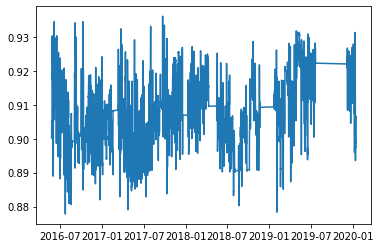

In [6]:
plt.plot(y_values.rolling(100).mean())

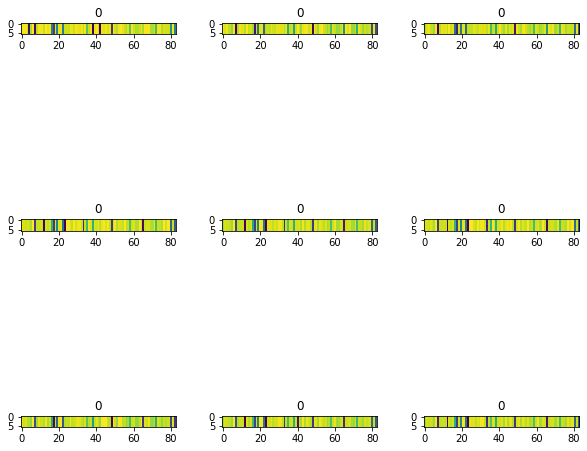

In [7]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    idx = np.random.randint(0,len(X))
    plt.imshow(X[idx])
    plt.title(y[idx])

# reshape

In [8]:
TIME_PERIODS,num_sensors = X[0].shape
input_shape = TIME_PERIODS*num_sensors
X = X.reshape(-1,input_shape)
print(TIME_PERIODS,num_sensors)
print(input_shape)
print(X.shape,y.shape)

6 83
498
(130922, 498) (130922,)


# sklearn time split

In [9]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(task_type='GPU')

In [10]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score

y_pred = []
k_fold_date = {}

t = 0
for train_index,test_index in tqdm(TimeSeriesSplit().split(i_lst)):
    k_fold_date[str(t)+'_train'] = np.array(i_lst.tolist())[train_index]
    k_fold_date[str(t)+'_test'] = np.array(i_lst.tolist())[test_index]
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    
    if t == 0:
        y_pred.extend(model.predict(X_train))
    y_pred.extend(model.predict(X_test))
    
    t += 1

0:	learn: 1.0412116	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.9886423	total: 106ms	remaining: 53.1s
2:	learn: 0.9402269	total: 151ms	remaining: 50.3s
3:	learn: 0.8955311	total: 197ms	remaining: 49s
4:	learn: 0.8542532	total: 245ms	remaining: 48.8s
5:	learn: 0.8157604	total: 292ms	remaining: 48.4s
6:	learn: 0.7799221	total: 340ms	remaining: 48.2s
7:	learn: 0.7463643	total: 384ms	remaining: 47.6s
8:	learn: 0.7148450	total: 426ms	remaining: 46.9s
9:	learn: 0.6853701	total: 472ms	remaining: 46.7s
10:	learn: 0.6575615	total: 515ms	remaining: 46.3s
11:	learn: 0.6313325	total: 559ms	remaining: 46.1s
12:	learn: 0.6065698	total: 600ms	remaining: 45.5s
13:	learn: 0.5831959	total: 641ms	remaining: 45.1s
14:	learn: 0.5610220	total: 683ms	remaining: 44.9s
15:	learn: 0.5399666	total: 723ms	remaining: 44.5s
16:	learn: 0.5200580	total: 766ms	remaining: 44.3s
17:	learn: 0.5011088	total: 811ms	remaining: 44.2s
18:	learn: 0.4831024	total: 856ms	remaining: 44.2s
19:	learn: 0.4659370	total: 899ms	remainin

161:	learn: 0.0438933	total: 7.4s	remaining: 38.3s
162:	learn: 0.0437878	total: 7.45s	remaining: 38.2s
163:	learn: 0.0436952	total: 7.49s	remaining: 38.2s
164:	learn: 0.0435979	total: 7.53s	remaining: 38.1s
165:	learn: 0.0434953	total: 7.58s	remaining: 38.1s
166:	learn: 0.0433641	total: 7.63s	remaining: 38.1s
167:	learn: 0.0432701	total: 7.67s	remaining: 38s
168:	learn: 0.0431642	total: 7.71s	remaining: 37.9s
169:	learn: 0.0430687	total: 7.76s	remaining: 37.9s
170:	learn: 0.0430003	total: 7.8s	remaining: 37.8s
171:	learn: 0.0428782	total: 7.85s	remaining: 37.8s
172:	learn: 0.0427922	total: 7.89s	remaining: 37.7s
173:	learn: 0.0427022	total: 7.94s	remaining: 37.7s
174:	learn: 0.0426387	total: 7.98s	remaining: 37.6s
175:	learn: 0.0425631	total: 8.03s	remaining: 37.6s
176:	learn: 0.0424952	total: 8.07s	remaining: 37.5s
177:	learn: 0.0424472	total: 8.12s	remaining: 37.5s
178:	learn: 0.0423245	total: 8.16s	remaining: 37.5s
179:	learn: 0.0422733	total: 8.21s	remaining: 37.4s
180:	learn: 0.04

320:	learn: 0.0355420	total: 14.5s	remaining: 30.6s
321:	learn: 0.0355109	total: 14.5s	remaining: 30.6s
322:	learn: 0.0354378	total: 14.6s	remaining: 30.5s
323:	learn: 0.0353797	total: 14.6s	remaining: 30.5s
324:	learn: 0.0353337	total: 14.6s	remaining: 30.4s
325:	learn: 0.0352853	total: 14.7s	remaining: 30.4s
326:	learn: 0.0352655	total: 14.7s	remaining: 30.3s
327:	learn: 0.0352008	total: 14.8s	remaining: 30.3s
328:	learn: 0.0351703	total: 14.8s	remaining: 30.2s
329:	learn: 0.0351388	total: 14.9s	remaining: 30.2s
330:	learn: 0.0351202	total: 14.9s	remaining: 30.1s
331:	learn: 0.0351055	total: 15s	remaining: 30.1s
332:	learn: 0.0350733	total: 15s	remaining: 30s
333:	learn: 0.0350604	total: 15s	remaining: 30s
334:	learn: 0.0350191	total: 15.1s	remaining: 29.9s
335:	learn: 0.0350018	total: 15.1s	remaining: 29.9s
336:	learn: 0.0349723	total: 15.2s	remaining: 29.8s
337:	learn: 0.0349351	total: 15.2s	remaining: 29.8s
338:	learn: 0.0349147	total: 15.3s	remaining: 29.7s
339:	learn: 0.0348523	

479:	learn: 0.0306869	total: 21.5s	remaining: 23.3s
480:	learn: 0.0306632	total: 21.6s	remaining: 23.3s
481:	learn: 0.0306317	total: 21.6s	remaining: 23.3s
482:	learn: 0.0305856	total: 21.7s	remaining: 23.2s
483:	learn: 0.0305686	total: 21.7s	remaining: 23.2s
484:	learn: 0.0305300	total: 21.8s	remaining: 23.1s
485:	learn: 0.0305124	total: 21.8s	remaining: 23.1s
486:	learn: 0.0304927	total: 21.9s	remaining: 23s
487:	learn: 0.0304786	total: 21.9s	remaining: 23s
488:	learn: 0.0304440	total: 22s	remaining: 22.9s
489:	learn: 0.0304115	total: 22s	remaining: 22.9s
490:	learn: 0.0303782	total: 22s	remaining: 22.9s
491:	learn: 0.0303490	total: 22.1s	remaining: 22.8s
492:	learn: 0.0303256	total: 22.1s	remaining: 22.8s
493:	learn: 0.0302960	total: 22.2s	remaining: 22.7s
494:	learn: 0.0302754	total: 22.2s	remaining: 22.7s
495:	learn: 0.0302484	total: 22.3s	remaining: 22.6s
496:	learn: 0.0302363	total: 22.3s	remaining: 22.6s
497:	learn: 0.0302063	total: 22.4s	remaining: 22.5s
498:	learn: 0.0301815	

638:	learn: 0.0266616	total: 29.1s	remaining: 16.4s
639:	learn: 0.0266324	total: 29.1s	remaining: 16.4s
640:	learn: 0.0266088	total: 29.2s	remaining: 16.4s
641:	learn: 0.0265931	total: 29.2s	remaining: 16.3s
642:	learn: 0.0265673	total: 29.3s	remaining: 16.3s
643:	learn: 0.0265408	total: 29.3s	remaining: 16.2s
644:	learn: 0.0265051	total: 29.4s	remaining: 16.2s
645:	learn: 0.0264840	total: 29.4s	remaining: 16.1s
646:	learn: 0.0264723	total: 29.5s	remaining: 16.1s
647:	learn: 0.0264563	total: 29.5s	remaining: 16s
648:	learn: 0.0264377	total: 29.6s	remaining: 16s
649:	learn: 0.0263874	total: 29.6s	remaining: 16s
650:	learn: 0.0263733	total: 29.7s	remaining: 15.9s
651:	learn: 0.0263515	total: 29.7s	remaining: 15.9s
652:	learn: 0.0263360	total: 29.8s	remaining: 15.8s
653:	learn: 0.0263192	total: 29.8s	remaining: 15.8s
654:	learn: 0.0263057	total: 29.9s	remaining: 15.7s
655:	learn: 0.0262735	total: 29.9s	remaining: 15.7s
656:	learn: 0.0262504	total: 30s	remaining: 15.6s
657:	learn: 0.026208

797:	learn: 0.0231244	total: 36.1s	remaining: 9.14s
798:	learn: 0.0230974	total: 36.2s	remaining: 9.09s
799:	learn: 0.0230788	total: 36.2s	remaining: 9.05s
800:	learn: 0.0230636	total: 36.2s	remaining: 9s
801:	learn: 0.0230474	total: 36.3s	remaining: 8.96s
802:	learn: 0.0230259	total: 36.3s	remaining: 8.91s
803:	learn: 0.0230003	total: 36.4s	remaining: 8.87s
804:	learn: 0.0229773	total: 36.4s	remaining: 8.82s
805:	learn: 0.0229479	total: 36.5s	remaining: 8.77s
806:	learn: 0.0229277	total: 36.5s	remaining: 8.73s
807:	learn: 0.0229140	total: 36.5s	remaining: 8.68s
808:	learn: 0.0228965	total: 36.6s	remaining: 8.64s
809:	learn: 0.0228776	total: 36.6s	remaining: 8.59s
810:	learn: 0.0228692	total: 36.7s	remaining: 8.54s
811:	learn: 0.0228541	total: 36.7s	remaining: 8.5s
812:	learn: 0.0227993	total: 36.8s	remaining: 8.45s
813:	learn: 0.0227890	total: 36.8s	remaining: 8.41s
814:	learn: 0.0227656	total: 36.8s	remaining: 8.36s
815:	learn: 0.0227421	total: 36.9s	remaining: 8.31s
816:	learn: 0.02

956:	learn: 0.0202145	total: 43s	remaining: 1.93s
957:	learn: 0.0201863	total: 43s	remaining: 1.89s
958:	learn: 0.0201599	total: 43.1s	remaining: 1.84s
959:	learn: 0.0201143	total: 43.1s	remaining: 1.8s
960:	learn: 0.0200970	total: 43.1s	remaining: 1.75s
961:	learn: 0.0200865	total: 43.2s	remaining: 1.71s
962:	learn: 0.0200755	total: 43.2s	remaining: 1.66s
963:	learn: 0.0200600	total: 43.3s	remaining: 1.62s
964:	learn: 0.0200494	total: 43.3s	remaining: 1.57s
965:	learn: 0.0200034	total: 43.4s	remaining: 1.53s
966:	learn: 0.0199942	total: 43.4s	remaining: 1.48s
967:	learn: 0.0199780	total: 43.4s	remaining: 1.44s
968:	learn: 0.0199650	total: 43.5s	remaining: 1.39s
969:	learn: 0.0199451	total: 43.5s	remaining: 1.35s
970:	learn: 0.0199320	total: 43.6s	remaining: 1.3s
971:	learn: 0.0199179	total: 43.6s	remaining: 1.26s
972:	learn: 0.0199095	total: 43.7s	remaining: 1.21s
973:	learn: 0.0198982	total: 43.7s	remaining: 1.17s
974:	learn: 0.0198760	total: 43.7s	remaining: 1.12s
975:	learn: 0.0198

117:	learn: 0.0577711	total: 4.22s	remaining: 31.5s
118:	learn: 0.0573116	total: 4.25s	remaining: 31.5s
119:	learn: 0.0568650	total: 4.29s	remaining: 31.5s
120:	learn: 0.0564515	total: 4.33s	remaining: 31.4s
121:	learn: 0.0560450	total: 4.37s	remaining: 31.4s
122:	learn: 0.0556610	total: 4.41s	remaining: 31.5s
123:	learn: 0.0552983	total: 4.46s	remaining: 31.5s
124:	learn: 0.0549368	total: 4.5s	remaining: 31.5s
125:	learn: 0.0545847	total: 4.53s	remaining: 31.4s
126:	learn: 0.0542340	total: 4.57s	remaining: 31.4s
127:	learn: 0.0538971	total: 4.6s	remaining: 31.3s
128:	learn: 0.0535404	total: 4.64s	remaining: 31.3s
129:	learn: 0.0532099	total: 4.67s	remaining: 31.3s
130:	learn: 0.0529067	total: 4.71s	remaining: 31.2s
131:	learn: 0.0526061	total: 4.74s	remaining: 31.2s
132:	learn: 0.0523149	total: 4.78s	remaining: 31.2s
133:	learn: 0.0520411	total: 4.82s	remaining: 31.1s
134:	learn: 0.0517608	total: 4.85s	remaining: 31.1s
135:	learn: 0.0514978	total: 4.89s	remaining: 31.1s
136:	learn: 0.

276:	learn: 0.0417517	total: 9.62s	remaining: 25.1s
277:	learn: 0.0417259	total: 9.65s	remaining: 25.1s
278:	learn: 0.0416950	total: 9.68s	remaining: 25s
279:	learn: 0.0416579	total: 9.71s	remaining: 25s
280:	learn: 0.0416410	total: 9.74s	remaining: 24.9s
281:	learn: 0.0415894	total: 9.78s	remaining: 24.9s
282:	learn: 0.0415732	total: 9.81s	remaining: 24.8s
283:	learn: 0.0415462	total: 9.84s	remaining: 24.8s
284:	learn: 0.0415168	total: 9.88s	remaining: 24.8s
285:	learn: 0.0414971	total: 9.91s	remaining: 24.7s
286:	learn: 0.0414526	total: 9.94s	remaining: 24.7s
287:	learn: 0.0413983	total: 9.98s	remaining: 24.7s
288:	learn: 0.0413753	total: 10s	remaining: 24.6s
289:	learn: 0.0413362	total: 10s	remaining: 24.6s
290:	learn: 0.0413132	total: 10.1s	remaining: 24.5s
291:	learn: 0.0412910	total: 10.1s	remaining: 24.5s
292:	learn: 0.0412724	total: 10.1s	remaining: 24.4s
293:	learn: 0.0412451	total: 10.2s	remaining: 24.4s
294:	learn: 0.0412209	total: 10.2s	remaining: 24.4s
295:	learn: 0.041169

435:	learn: 0.0375780	total: 15s	remaining: 19.4s
436:	learn: 0.0375565	total: 15s	remaining: 19.3s
437:	learn: 0.0375445	total: 15s	remaining: 19.3s
438:	learn: 0.0375235	total: 15.1s	remaining: 19.3s
439:	learn: 0.0375084	total: 15.1s	remaining: 19.2s
440:	learn: 0.0374848	total: 15.2s	remaining: 19.2s
441:	learn: 0.0374449	total: 15.2s	remaining: 19.2s
442:	learn: 0.0374350	total: 15.2s	remaining: 19.2s
443:	learn: 0.0374055	total: 15.3s	remaining: 19.1s
444:	learn: 0.0373862	total: 15.3s	remaining: 19.1s
445:	learn: 0.0373491	total: 15.4s	remaining: 19.1s
446:	learn: 0.0373223	total: 15.4s	remaining: 19.1s
447:	learn: 0.0373105	total: 15.4s	remaining: 19s
448:	learn: 0.0372911	total: 15.5s	remaining: 19s
449:	learn: 0.0372689	total: 15.5s	remaining: 19s
450:	learn: 0.0372554	total: 15.6s	remaining: 19s
451:	learn: 0.0372281	total: 15.6s	remaining: 18.9s
452:	learn: 0.0372155	total: 15.7s	remaining: 18.9s
453:	learn: 0.0372041	total: 15.7s	remaining: 18.9s
454:	learn: 0.0371852	tota

594:	learn: 0.0345095	total: 21.6s	remaining: 14.7s
595:	learn: 0.0344825	total: 21.6s	remaining: 14.6s
596:	learn: 0.0344589	total: 21.7s	remaining: 14.6s
597:	learn: 0.0344195	total: 21.7s	remaining: 14.6s
598:	learn: 0.0344058	total: 21.7s	remaining: 14.6s
599:	learn: 0.0343948	total: 21.8s	remaining: 14.5s
600:	learn: 0.0343740	total: 21.8s	remaining: 14.5s
601:	learn: 0.0343579	total: 21.9s	remaining: 14.5s
602:	learn: 0.0343440	total: 21.9s	remaining: 14.4s
603:	learn: 0.0343308	total: 21.9s	remaining: 14.4s
604:	learn: 0.0343032	total: 22s	remaining: 14.4s
605:	learn: 0.0342722	total: 22s	remaining: 14.3s
606:	learn: 0.0342569	total: 22.1s	remaining: 14.3s
607:	learn: 0.0342386	total: 22.1s	remaining: 14.3s
608:	learn: 0.0342299	total: 22.2s	remaining: 14.2s
609:	learn: 0.0342132	total: 22.2s	remaining: 14.2s
610:	learn: 0.0341943	total: 22.2s	remaining: 14.2s
611:	learn: 0.0341651	total: 22.3s	remaining: 14.1s
612:	learn: 0.0341453	total: 22.3s	remaining: 14.1s
613:	learn: 0.03

753:	learn: 0.0316264	total: 28.7s	remaining: 9.36s
754:	learn: 0.0316175	total: 28.7s	remaining: 9.33s
755:	learn: 0.0315982	total: 28.8s	remaining: 9.29s
756:	learn: 0.0315878	total: 28.8s	remaining: 9.26s
757:	learn: 0.0315684	total: 28.9s	remaining: 9.22s
758:	learn: 0.0315550	total: 28.9s	remaining: 9.18s
759:	learn: 0.0315351	total: 29s	remaining: 9.15s
760:	learn: 0.0315111	total: 29s	remaining: 9.11s
761:	learn: 0.0314942	total: 29.1s	remaining: 9.08s
762:	learn: 0.0314812	total: 29.1s	remaining: 9.04s
763:	learn: 0.0314604	total: 29.2s	remaining: 9.01s
764:	learn: 0.0314308	total: 29.2s	remaining: 8.97s
765:	learn: 0.0314121	total: 29.3s	remaining: 8.94s
766:	learn: 0.0313868	total: 29.3s	remaining: 8.9s
767:	learn: 0.0313734	total: 29.3s	remaining: 8.87s
768:	learn: 0.0313439	total: 29.4s	remaining: 8.83s
769:	learn: 0.0313237	total: 29.4s	remaining: 8.79s
770:	learn: 0.0313130	total: 29.5s	remaining: 8.76s
771:	learn: 0.0312998	total: 29.5s	remaining: 8.72s
772:	learn: 0.031

912:	learn: 0.0290686	total: 35.6s	remaining: 3.39s
913:	learn: 0.0290250	total: 35.7s	remaining: 3.35s
914:	learn: 0.0290162	total: 35.7s	remaining: 3.32s
915:	learn: 0.0290062	total: 35.8s	remaining: 3.28s
916:	learn: 0.0289737	total: 35.8s	remaining: 3.24s
917:	learn: 0.0289590	total: 35.9s	remaining: 3.21s
918:	learn: 0.0289495	total: 35.9s	remaining: 3.17s
919:	learn: 0.0289234	total: 36s	remaining: 3.13s
920:	learn: 0.0289109	total: 36s	remaining: 3.09s
921:	learn: 0.0288862	total: 36.1s	remaining: 3.05s
922:	learn: 0.0288618	total: 36.1s	remaining: 3.01s
923:	learn: 0.0288493	total: 36.1s	remaining: 2.97s
924:	learn: 0.0288339	total: 36.2s	remaining: 2.93s
925:	learn: 0.0288162	total: 36.2s	remaining: 2.9s
926:	learn: 0.0287886	total: 36.3s	remaining: 2.86s
927:	learn: 0.0287768	total: 36.3s	remaining: 2.82s
928:	learn: 0.0287589	total: 36.4s	remaining: 2.78s
929:	learn: 0.0287404	total: 36.4s	remaining: 2.74s
930:	learn: 0.0287251	total: 36.5s	remaining: 2.7s
931:	learn: 0.0287

72:	learn: 0.1007642	total: 2.56s	remaining: 32.5s
73:	learn: 0.0985781	total: 2.59s	remaining: 32.4s
74:	learn: 0.0964775	total: 2.63s	remaining: 32.4s
75:	learn: 0.0944405	total: 2.66s	remaining: 32.3s
76:	learn: 0.0924792	total: 2.69s	remaining: 32.3s
77:	learn: 0.0905720	total: 2.73s	remaining: 32.2s
78:	learn: 0.0887262	total: 2.76s	remaining: 32.2s
79:	learn: 0.0869390	total: 2.79s	remaining: 32.1s
80:	learn: 0.0852212	total: 2.83s	remaining: 32.1s
81:	learn: 0.0835721	total: 2.86s	remaining: 32s
82:	learn: 0.0819649	total: 2.9s	remaining: 32s
83:	learn: 0.0804208	total: 2.94s	remaining: 32s
84:	learn: 0.0789201	total: 2.97s	remaining: 32s
85:	learn: 0.0774640	total: 3s	remaining: 31.9s
86:	learn: 0.0760489	total: 3.04s	remaining: 31.9s
87:	learn: 0.0746894	total: 3.07s	remaining: 31.9s
88:	learn: 0.0733631	total: 3.11s	remaining: 31.8s
89:	learn: 0.0721014	total: 3.14s	remaining: 31.8s
90:	learn: 0.0708672	total: 3.18s	remaining: 31.8s
91:	learn: 0.0696882	total: 3.21s	remaining

232:	learn: 0.0352177	total: 8.14s	remaining: 26.8s
233:	learn: 0.0351945	total: 8.18s	remaining: 26.8s
234:	learn: 0.0351654	total: 8.21s	remaining: 26.7s
235:	learn: 0.0351458	total: 8.25s	remaining: 26.7s
236:	learn: 0.0351141	total: 8.28s	remaining: 26.7s
237:	learn: 0.0350902	total: 8.31s	remaining: 26.6s
238:	learn: 0.0350498	total: 8.36s	remaining: 26.6s
239:	learn: 0.0350343	total: 8.4s	remaining: 26.6s
240:	learn: 0.0350038	total: 8.45s	remaining: 26.6s
241:	learn: 0.0349817	total: 8.49s	remaining: 26.6s
242:	learn: 0.0349547	total: 8.54s	remaining: 26.6s
243:	learn: 0.0349393	total: 8.58s	remaining: 26.6s
244:	learn: 0.0348950	total: 8.63s	remaining: 26.6s
245:	learn: 0.0348732	total: 8.67s	remaining: 26.6s
246:	learn: 0.0348513	total: 8.71s	remaining: 26.6s
247:	learn: 0.0348197	total: 8.75s	remaining: 26.5s
248:	learn: 0.0347967	total: 8.8s	remaining: 26.5s
249:	learn: 0.0347718	total: 8.84s	remaining: 26.5s
250:	learn: 0.0347389	total: 8.88s	remaining: 26.5s
251:	learn: 0.

391:	learn: 0.0317248	total: 15.3s	remaining: 23.8s
392:	learn: 0.0317011	total: 15.4s	remaining: 23.7s
393:	learn: 0.0316519	total: 15.4s	remaining: 23.7s
394:	learn: 0.0316364	total: 15.4s	remaining: 23.7s
395:	learn: 0.0316174	total: 15.5s	remaining: 23.6s
396:	learn: 0.0316042	total: 15.5s	remaining: 23.6s
397:	learn: 0.0315880	total: 15.6s	remaining: 23.6s
398:	learn: 0.0315696	total: 15.6s	remaining: 23.6s
399:	learn: 0.0315623	total: 15.7s	remaining: 23.5s
400:	learn: 0.0315487	total: 15.7s	remaining: 23.5s
401:	learn: 0.0315344	total: 15.8s	remaining: 23.5s
402:	learn: 0.0315206	total: 15.8s	remaining: 23.5s
403:	learn: 0.0315113	total: 15.9s	remaining: 23.4s
404:	learn: 0.0315056	total: 15.9s	remaining: 23.4s
405:	learn: 0.0314929	total: 16s	remaining: 23.4s
406:	learn: 0.0314650	total: 16s	remaining: 23.3s
407:	learn: 0.0314288	total: 16.1s	remaining: 23.3s
408:	learn: 0.0313916	total: 16.1s	remaining: 23.3s
409:	learn: 0.0313757	total: 16.2s	remaining: 23.3s
410:	learn: 0.03

550:	learn: 0.0291422	total: 22.5s	remaining: 18.4s
551:	learn: 0.0291352	total: 22.6s	remaining: 18.3s
552:	learn: 0.0291223	total: 22.6s	remaining: 18.3s
553:	learn: 0.0291123	total: 22.6s	remaining: 18.2s
554:	learn: 0.0290902	total: 22.7s	remaining: 18.2s
555:	learn: 0.0290773	total: 22.7s	remaining: 18.2s
556:	learn: 0.0290625	total: 22.8s	remaining: 18.1s
557:	learn: 0.0290518	total: 22.8s	remaining: 18.1s
558:	learn: 0.0290365	total: 22.9s	remaining: 18.1s
559:	learn: 0.0290273	total: 22.9s	remaining: 18s
560:	learn: 0.0290188	total: 23s	remaining: 18s
561:	learn: 0.0289975	total: 23s	remaining: 17.9s
562:	learn: 0.0289787	total: 23.1s	remaining: 17.9s
563:	learn: 0.0289641	total: 23.1s	remaining: 17.9s
564:	learn: 0.0289547	total: 23.2s	remaining: 17.8s
565:	learn: 0.0289203	total: 23.2s	remaining: 17.8s
566:	learn: 0.0289034	total: 23.2s	remaining: 17.7s
567:	learn: 0.0288929	total: 23.3s	remaining: 17.7s
568:	learn: 0.0288803	total: 23.3s	remaining: 17.7s
569:	learn: 0.028868

709:	learn: 0.0270561	total: 29.8s	remaining: 12.2s
710:	learn: 0.0270357	total: 29.8s	remaining: 12.1s
711:	learn: 0.0270206	total: 29.9s	remaining: 12.1s
712:	learn: 0.0270131	total: 29.9s	remaining: 12s
713:	learn: 0.0270055	total: 30s	remaining: 12s
714:	learn: 0.0269949	total: 30s	remaining: 12s
715:	learn: 0.0269760	total: 30s	remaining: 11.9s
716:	learn: 0.0269662	total: 30.1s	remaining: 11.9s
717:	learn: 0.0269576	total: 30.1s	remaining: 11.8s
718:	learn: 0.0269436	total: 30.2s	remaining: 11.8s
719:	learn: 0.0269263	total: 30.2s	remaining: 11.8s
720:	learn: 0.0269171	total: 30.3s	remaining: 11.7s
721:	learn: 0.0269132	total: 30.3s	remaining: 11.7s
722:	learn: 0.0269034	total: 30.4s	remaining: 11.6s
723:	learn: 0.0268930	total: 30.4s	remaining: 11.6s
724:	learn: 0.0268819	total: 30.5s	remaining: 11.6s
725:	learn: 0.0268709	total: 30.5s	remaining: 11.5s
726:	learn: 0.0268503	total: 30.5s	remaining: 11.5s
727:	learn: 0.0268297	total: 30.6s	remaining: 11.4s
728:	learn: 0.0268125	to

868:	learn: 0.0251896	total: 36.9s	remaining: 5.56s
869:	learn: 0.0251761	total: 36.9s	remaining: 5.52s
870:	learn: 0.0251662	total: 37s	remaining: 5.47s
871:	learn: 0.0251474	total: 37s	remaining: 5.43s
872:	learn: 0.0251357	total: 37s	remaining: 5.39s
873:	learn: 0.0251268	total: 37.1s	remaining: 5.35s
874:	learn: 0.0251171	total: 37.1s	remaining: 5.3s
875:	learn: 0.0251088	total: 37.2s	remaining: 5.26s
876:	learn: 0.0250935	total: 37.2s	remaining: 5.22s
877:	learn: 0.0250868	total: 37.3s	remaining: 5.18s
878:	learn: 0.0250713	total: 37.3s	remaining: 5.14s
879:	learn: 0.0250614	total: 37.4s	remaining: 5.09s
880:	learn: 0.0250490	total: 37.4s	remaining: 5.05s
881:	learn: 0.0250354	total: 37.4s	remaining: 5.01s
882:	learn: 0.0250209	total: 37.5s	remaining: 4.97s
883:	learn: 0.0250132	total: 37.5s	remaining: 4.92s
884:	learn: 0.0250053	total: 37.6s	remaining: 4.88s
885:	learn: 0.0249891	total: 37.6s	remaining: 4.84s
886:	learn: 0.0249771	total: 37.7s	remaining: 4.8s
887:	learn: 0.024965

28:	learn: 0.3523382	total: 1.35s	remaining: 45.2s
29:	learn: 0.3416127	total: 1.39s	remaining: 45s
30:	learn: 0.3313229	total: 1.43s	remaining: 44.8s
31:	learn: 0.3214555	total: 1.48s	remaining: 44.6s
32:	learn: 0.3119943	total: 1.52s	remaining: 44.4s
33:	learn: 0.3028991	total: 1.56s	remaining: 44.3s
34:	learn: 0.2941807	total: 1.6s	remaining: 44.1s
35:	learn: 0.2858212	total: 1.64s	remaining: 44s
36:	learn: 0.2777842	total: 1.69s	remaining: 44s
37:	learn: 0.2700576	total: 1.73s	remaining: 43.8s
38:	learn: 0.2626210	total: 1.77s	remaining: 43.7s
39:	learn: 0.2554648	total: 1.82s	remaining: 43.6s
40:	learn: 0.2485920	total: 1.86s	remaining: 43.5s
41:	learn: 0.2419782	total: 1.9s	remaining: 43.4s
42:	learn: 0.2356216	total: 1.94s	remaining: 43.2s
43:	learn: 0.2294903	total: 1.98s	remaining: 43.1s
44:	learn: 0.2235918	total: 2.02s	remaining: 42.9s
45:	learn: 0.2179160	total: 2.06s	remaining: 42.8s
46:	learn: 0.2124532	total: 2.1s	remaining: 42.7s
47:	learn: 0.2071793	total: 2.15s	remain

188:	learn: 0.0608033	total: 8.79s	remaining: 37.7s
189:	learn: 0.0607387	total: 8.84s	remaining: 37.7s
190:	learn: 0.0606890	total: 8.88s	remaining: 37.6s
191:	learn: 0.0606415	total: 8.93s	remaining: 37.6s
192:	learn: 0.0605988	total: 8.97s	remaining: 37.5s
193:	learn: 0.0605342	total: 9.07s	remaining: 37.7s
194:	learn: 0.0604930	total: 9.12s	remaining: 37.7s
195:	learn: 0.0604463	total: 9.17s	remaining: 37.6s
196:	learn: 0.0603850	total: 9.23s	remaining: 37.6s
197:	learn: 0.0603412	total: 9.27s	remaining: 37.6s
198:	learn: 0.0602983	total: 9.32s	remaining: 37.5s
199:	learn: 0.0602379	total: 9.37s	remaining: 37.5s
200:	learn: 0.0601865	total: 9.42s	remaining: 37.4s
201:	learn: 0.0601249	total: 9.47s	remaining: 37.4s
202:	learn: 0.0600879	total: 9.52s	remaining: 37.4s
203:	learn: 0.0600374	total: 9.57s	remaining: 37.3s
204:	learn: 0.0599771	total: 9.62s	remaining: 37.3s
205:	learn: 0.0599412	total: 9.67s	remaining: 37.3s
206:	learn: 0.0598819	total: 9.71s	remaining: 37.2s
207:	learn: 

347:	learn: 0.0562796	total: 16s	remaining: 30.1s
348:	learn: 0.0562576	total: 16.1s	remaining: 30s
349:	learn: 0.0562281	total: 16.1s	remaining: 30s
350:	learn: 0.0562061	total: 16.2s	remaining: 29.9s
351:	learn: 0.0561873	total: 16.2s	remaining: 29.9s
352:	learn: 0.0561744	total: 16.3s	remaining: 29.9s
353:	learn: 0.0561518	total: 16.3s	remaining: 29.8s
354:	learn: 0.0561386	total: 16.4s	remaining: 29.8s
355:	learn: 0.0561234	total: 16.4s	remaining: 29.7s
356:	learn: 0.0561080	total: 16.5s	remaining: 29.7s
357:	learn: 0.0560950	total: 16.5s	remaining: 29.6s
358:	learn: 0.0560563	total: 16.5s	remaining: 29.5s
359:	learn: 0.0560108	total: 16.6s	remaining: 29.5s
360:	learn: 0.0559906	total: 16.6s	remaining: 29.4s
361:	learn: 0.0559572	total: 16.7s	remaining: 29.4s
362:	learn: 0.0559456	total: 16.7s	remaining: 29.3s
363:	learn: 0.0559234	total: 16.7s	remaining: 29.3s
364:	learn: 0.0559070	total: 16.8s	remaining: 29.2s
365:	learn: 0.0558935	total: 16.8s	remaining: 29.1s
366:	learn: 0.0558

506:	learn: 0.0535408	total: 22.8s	remaining: 22.2s
507:	learn: 0.0535263	total: 22.9s	remaining: 22.1s
508:	learn: 0.0535067	total: 22.9s	remaining: 22.1s
509:	learn: 0.0534939	total: 22.9s	remaining: 22s
510:	learn: 0.0534766	total: 23s	remaining: 22s
511:	learn: 0.0534603	total: 23s	remaining: 21.9s
512:	learn: 0.0534339	total: 23.1s	remaining: 21.9s
513:	learn: 0.0534066	total: 23.1s	remaining: 21.9s
514:	learn: 0.0533936	total: 23.2s	remaining: 21.8s
515:	learn: 0.0533810	total: 23.2s	remaining: 21.8s
516:	learn: 0.0533723	total: 23.3s	remaining: 21.7s
517:	learn: 0.0533586	total: 23.3s	remaining: 21.7s
518:	learn: 0.0533485	total: 23.3s	remaining: 21.6s
519:	learn: 0.0533394	total: 23.4s	remaining: 21.6s
520:	learn: 0.0533285	total: 23.4s	remaining: 21.5s
521:	learn: 0.0533156	total: 23.5s	remaining: 21.5s
522:	learn: 0.0533035	total: 23.5s	remaining: 21.4s
523:	learn: 0.0532756	total: 23.6s	remaining: 21.4s
524:	learn: 0.0532664	total: 23.6s	remaining: 21.3s
525:	learn: 0.053259

665:	learn: 0.0512469	total: 30.1s	remaining: 15.1s
666:	learn: 0.0512305	total: 30.1s	remaining: 15s
667:	learn: 0.0512161	total: 30.2s	remaining: 15s
668:	learn: 0.0512031	total: 30.2s	remaining: 15s
669:	learn: 0.0511896	total: 30.3s	remaining: 14.9s
670:	learn: 0.0511776	total: 30.3s	remaining: 14.9s
671:	learn: 0.0511343	total: 30.4s	remaining: 14.8s
672:	learn: 0.0511272	total: 30.4s	remaining: 14.8s
673:	learn: 0.0511185	total: 30.5s	remaining: 14.7s
674:	learn: 0.0510956	total: 30.5s	remaining: 14.7s
675:	learn: 0.0510897	total: 30.6s	remaining: 14.7s
676:	learn: 0.0510789	total: 30.6s	remaining: 14.6s
677:	learn: 0.0510617	total: 30.7s	remaining: 14.6s
678:	learn: 0.0510469	total: 30.7s	remaining: 14.5s
679:	learn: 0.0510358	total: 30.8s	remaining: 14.5s
680:	learn: 0.0510269	total: 30.8s	remaining: 14.4s
681:	learn: 0.0510165	total: 30.9s	remaining: 14.4s
682:	learn: 0.0510080	total: 30.9s	remaining: 14.3s
683:	learn: 0.0510009	total: 31s	remaining: 14.3s
684:	learn: 0.050989

824:	learn: 0.0492162	total: 38.1s	remaining: 8.08s
825:	learn: 0.0492054	total: 38.1s	remaining: 8.03s
826:	learn: 0.0491905	total: 38.2s	remaining: 7.98s
827:	learn: 0.0491739	total: 38.2s	remaining: 7.94s
828:	learn: 0.0491635	total: 38.2s	remaining: 7.89s
829:	learn: 0.0491563	total: 38.3s	remaining: 7.84s
830:	learn: 0.0491328	total: 38.3s	remaining: 7.79s
831:	learn: 0.0491295	total: 38.4s	remaining: 7.75s
832:	learn: 0.0491188	total: 38.4s	remaining: 7.7s
833:	learn: 0.0491150	total: 38.5s	remaining: 7.65s
834:	learn: 0.0491029	total: 38.5s	remaining: 7.61s
835:	learn: 0.0490970	total: 38.5s	remaining: 7.56s
836:	learn: 0.0490833	total: 38.6s	remaining: 7.51s
837:	learn: 0.0490724	total: 38.6s	remaining: 7.46s
838:	learn: 0.0490599	total: 38.7s	remaining: 7.42s
839:	learn: 0.0490487	total: 38.7s	remaining: 7.37s
840:	learn: 0.0490436	total: 38.7s	remaining: 7.32s
841:	learn: 0.0490225	total: 38.8s	remaining: 7.28s
842:	learn: 0.0490163	total: 38.8s	remaining: 7.23s
843:	learn: 0

983:	learn: 0.0472240	total: 45.2s	remaining: 735ms
984:	learn: 0.0472133	total: 45.3s	remaining: 689ms
985:	learn: 0.0471984	total: 45.3s	remaining: 643ms
986:	learn: 0.0471875	total: 45.4s	remaining: 597ms
987:	learn: 0.0471773	total: 45.4s	remaining: 551ms
988:	learn: 0.0471534	total: 45.4s	remaining: 505ms
989:	learn: 0.0471469	total: 45.5s	remaining: 459ms
990:	learn: 0.0471360	total: 45.5s	remaining: 413ms
991:	learn: 0.0471173	total: 45.6s	remaining: 367ms
992:	learn: 0.0471089	total: 45.6s	remaining: 322ms
993:	learn: 0.0470924	total: 45.7s	remaining: 276ms
994:	learn: 0.0470825	total: 45.7s	remaining: 230ms
995:	learn: 0.0470744	total: 45.7s	remaining: 184ms
996:	learn: 0.0470626	total: 45.8s	remaining: 138ms
997:	learn: 0.0470411	total: 45.8s	remaining: 91.9ms
998:	learn: 0.0470270	total: 45.9s	remaining: 45.9ms
999:	learn: 0.0470185	total: 45.9s	remaining: 0us
0:	learn: 1.0421282	total: 60ms	remaining: 59.9s
1:	learn: 0.9904549	total: 114ms	remaining: 57.1s
2:	learn: 0.94295

144:	learn: 0.0739561	total: 6.88s	remaining: 40.6s
145:	learn: 0.0738010	total: 6.93s	remaining: 40.5s
146:	learn: 0.0736255	total: 6.98s	remaining: 40.5s
147:	learn: 0.0734764	total: 7.02s	remaining: 40.4s
148:	learn: 0.0733081	total: 7.07s	remaining: 40.4s
149:	learn: 0.0731705	total: 7.12s	remaining: 40.3s
150:	learn: 0.0730136	total: 7.16s	remaining: 40.3s
151:	learn: 0.0729024	total: 7.21s	remaining: 40.2s
152:	learn: 0.0727855	total: 7.25s	remaining: 40.1s
153:	learn: 0.0726170	total: 7.3s	remaining: 40.1s
154:	learn: 0.0724909	total: 7.34s	remaining: 40s
155:	learn: 0.0723165	total: 7.39s	remaining: 40s
156:	learn: 0.0721864	total: 7.44s	remaining: 39.9s
157:	learn: 0.0720372	total: 7.49s	remaining: 39.9s
158:	learn: 0.0718989	total: 7.54s	remaining: 39.9s
159:	learn: 0.0717701	total: 7.58s	remaining: 39.8s
160:	learn: 0.0716527	total: 7.62s	remaining: 39.7s
161:	learn: 0.0715371	total: 7.67s	remaining: 39.7s
162:	learn: 0.0714212	total: 7.71s	remaining: 39.6s
163:	learn: 0.071

303:	learn: 0.0651298	total: 14s	remaining: 32.1s
304:	learn: 0.0651084	total: 14.1s	remaining: 32s
305:	learn: 0.0650631	total: 14.1s	remaining: 32s
306:	learn: 0.0650311	total: 14.2s	remaining: 32s
307:	learn: 0.0649948	total: 14.2s	remaining: 31.9s
308:	learn: 0.0649810	total: 14.2s	remaining: 31.9s
309:	learn: 0.0649629	total: 14.3s	remaining: 31.8s
310:	learn: 0.0649401	total: 14.3s	remaining: 31.8s
311:	learn: 0.0649218	total: 14.4s	remaining: 31.7s
312:	learn: 0.0648981	total: 14.4s	remaining: 31.7s
313:	learn: 0.0648658	total: 14.5s	remaining: 31.6s
314:	learn: 0.0648167	total: 14.5s	remaining: 31.6s
315:	learn: 0.0647935	total: 14.6s	remaining: 31.5s
316:	learn: 0.0647685	total: 14.6s	remaining: 31.5s
317:	learn: 0.0647456	total: 14.7s	remaining: 31.5s
318:	learn: 0.0647273	total: 14.7s	remaining: 31.4s
319:	learn: 0.0646822	total: 14.8s	remaining: 31.4s
320:	learn: 0.0646574	total: 14.8s	remaining: 31.3s
321:	learn: 0.0646400	total: 14.9s	remaining: 31.3s
322:	learn: 0.064629

462:	learn: 0.0620650	total: 21.3s	remaining: 24.7s
463:	learn: 0.0620468	total: 21.3s	remaining: 24.6s
464:	learn: 0.0620280	total: 21.4s	remaining: 24.6s
465:	learn: 0.0620145	total: 21.4s	remaining: 24.5s
466:	learn: 0.0619965	total: 21.5s	remaining: 24.5s
467:	learn: 0.0619805	total: 21.5s	remaining: 24.5s
468:	learn: 0.0619627	total: 21.6s	remaining: 24.4s
469:	learn: 0.0619425	total: 21.6s	remaining: 24.4s
470:	learn: 0.0619167	total: 21.7s	remaining: 24.3s
471:	learn: 0.0618967	total: 21.7s	remaining: 24.3s
472:	learn: 0.0618785	total: 21.8s	remaining: 24.2s
473:	learn: 0.0618648	total: 21.8s	remaining: 24.2s
474:	learn: 0.0618515	total: 21.8s	remaining: 24.1s
475:	learn: 0.0618259	total: 21.9s	remaining: 24.1s
476:	learn: 0.0618131	total: 21.9s	remaining: 24s
477:	learn: 0.0618055	total: 22s	remaining: 24s
478:	learn: 0.0617910	total: 22s	remaining: 24s
479:	learn: 0.0617671	total: 22.1s	remaining: 23.9s
480:	learn: 0.0617490	total: 22.1s	remaining: 23.9s
481:	learn: 0.0617277	

621:	learn: 0.0595944	total: 28.6s	remaining: 17.4s
622:	learn: 0.0595844	total: 28.7s	remaining: 17.3s
623:	learn: 0.0595610	total: 28.7s	remaining: 17.3s
624:	learn: 0.0595511	total: 28.7s	remaining: 17.2s
625:	learn: 0.0595230	total: 28.8s	remaining: 17.2s
626:	learn: 0.0595157	total: 28.8s	remaining: 17.2s
627:	learn: 0.0595022	total: 28.9s	remaining: 17.1s
628:	learn: 0.0594949	total: 28.9s	remaining: 17.1s
629:	learn: 0.0594831	total: 29s	remaining: 17s
630:	learn: 0.0594693	total: 29s	remaining: 17s
631:	learn: 0.0594574	total: 29.1s	remaining: 16.9s
632:	learn: 0.0594407	total: 29.1s	remaining: 16.9s
633:	learn: 0.0594229	total: 29.1s	remaining: 16.8s
634:	learn: 0.0593947	total: 29.2s	remaining: 16.8s
635:	learn: 0.0593616	total: 29.2s	remaining: 16.7s
636:	learn: 0.0593541	total: 29.3s	remaining: 16.7s
637:	learn: 0.0593435	total: 29.3s	remaining: 16.6s
638:	learn: 0.0593344	total: 29.4s	remaining: 16.6s
639:	learn: 0.0593231	total: 29.4s	remaining: 16.5s
640:	learn: 0.059306

780:	learn: 0.0576209	total: 36.1s	remaining: 10.1s
781:	learn: 0.0576117	total: 36.1s	remaining: 10.1s
782:	learn: 0.0575950	total: 36.2s	remaining: 10s
783:	learn: 0.0575849	total: 36.2s	remaining: 9.98s
784:	learn: 0.0575701	total: 36.3s	remaining: 9.93s
785:	learn: 0.0575613	total: 36.3s	remaining: 9.89s
786:	learn: 0.0575569	total: 36.4s	remaining: 9.84s
787:	learn: 0.0575463	total: 36.4s	remaining: 9.79s
788:	learn: 0.0575184	total: 36.5s	remaining: 9.75s
789:	learn: 0.0575050	total: 36.5s	remaining: 9.7s
790:	learn: 0.0574907	total: 36.6s	remaining: 9.66s
791:	learn: 0.0574728	total: 36.6s	remaining: 9.61s
792:	learn: 0.0574550	total: 36.7s	remaining: 9.57s
793:	learn: 0.0574469	total: 36.7s	remaining: 9.52s
794:	learn: 0.0574379	total: 36.8s	remaining: 9.48s
795:	learn: 0.0574249	total: 36.8s	remaining: 9.43s
796:	learn: 0.0574135	total: 36.9s	remaining: 9.39s
797:	learn: 0.0574002	total: 36.9s	remaining: 9.34s
798:	learn: 0.0573842	total: 36.9s	remaining: 9.29s
799:	learn: 0.0

939:	learn: 0.0558102	total: 43.8s	remaining: 2.79s
940:	learn: 0.0557990	total: 43.8s	remaining: 2.75s
941:	learn: 0.0557896	total: 43.9s	remaining: 2.7s
942:	learn: 0.0557801	total: 43.9s	remaining: 2.65s
943:	learn: 0.0557597	total: 44s	remaining: 2.61s
944:	learn: 0.0557511	total: 44s	remaining: 2.56s
945:	learn: 0.0557336	total: 44.1s	remaining: 2.52s
946:	learn: 0.0557279	total: 44.1s	remaining: 2.47s
947:	learn: 0.0557153	total: 44.2s	remaining: 2.42s
948:	learn: 0.0556960	total: 44.2s	remaining: 2.38s
949:	learn: 0.0556860	total: 44.3s	remaining: 2.33s
950:	learn: 0.0556719	total: 44.3s	remaining: 2.28s
951:	learn: 0.0556571	total: 44.4s	remaining: 2.24s
952:	learn: 0.0556403	total: 44.4s	remaining: 2.19s
953:	learn: 0.0556276	total: 44.5s	remaining: 2.15s
954:	learn: 0.0556159	total: 44.5s	remaining: 2.1s
955:	learn: 0.0556087	total: 44.6s	remaining: 2.05s
956:	learn: 0.0556022	total: 44.6s	remaining: 2s
957:	learn: 0.0555873	total: 44.7s	remaining: 1.96s
958:	learn: 0.0555764

# make prediction

In [29]:
y_pred = pd.Series([i[0] for i in y_pred],name='y_pred',index=i_lst).sort_index()
y_real = pd.Series(y,name='y_real',index=i_lst).sort_index()

# metric 

In [30]:
res = pd.DataFrame(columns=['f1_score'])
tscv = TimeSeriesSplit().split(i_lst)
for train_index,test_index in tscv:
    tag = str(y_real[test_index].index[0].date())+'~'+str(y_real[test_index].index[-1].date())
    res.loc[tag,'f1_score'] = f1_score(y_real[test_index],y_pred[test_index],average='weighted')

In [31]:
res

,f1_score
2016-11-17~2017-05-26,0.987643
2017-05-26~2017-10-28,0.996221
2017-10-28~2018-06-18,0.953091
2018-06-18~2019-02-27,0.960796
2019-02-27~2020-01-14,0.986478


# plot

In [56]:
def plot_trend(date):
    S = y_pred[date][y_pred == -1].index
    H = y_pred[date][y_pred == 0].index
    L = y_pred[date][y_pred == 1].index
    fig = plt.figure(figsize=(20,5))
    plot_data = y_values.rolling(1).mean()
    plt.plot(plot_data[date])
    plt.scatter(plot_data[L].index,plot_data[L],color='red',label='Long')
    plt.scatter(plot_data[S].index,plot_data[S],color='black',label='Short')
    plt.legend()
    plt.show()

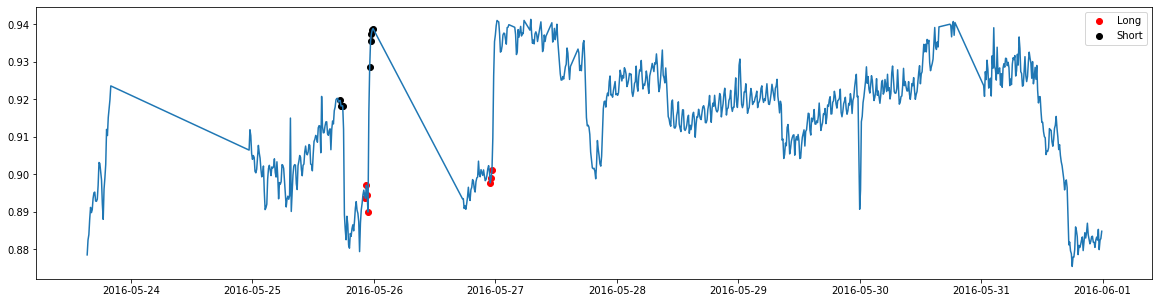

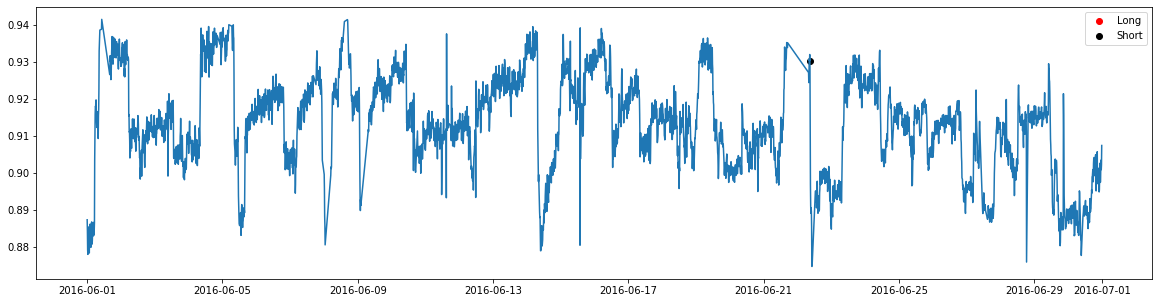

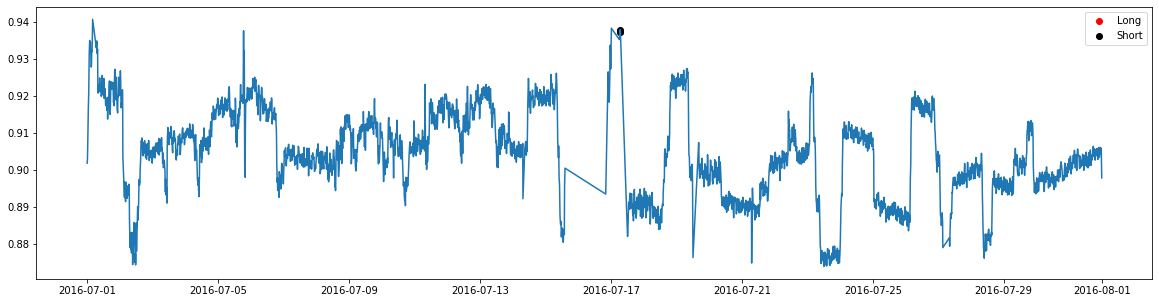

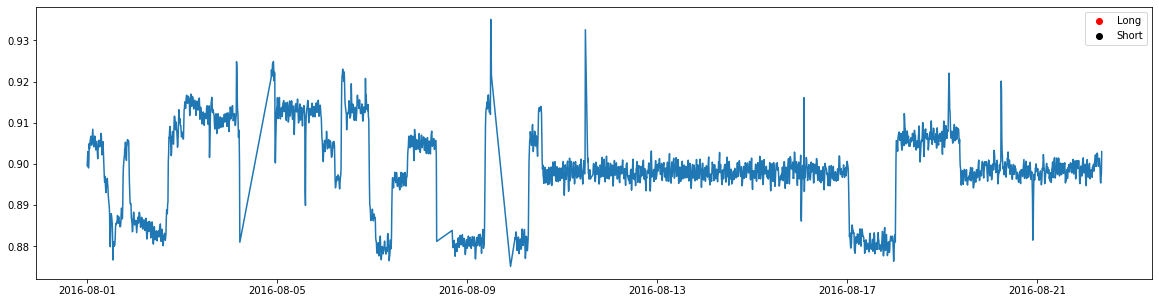

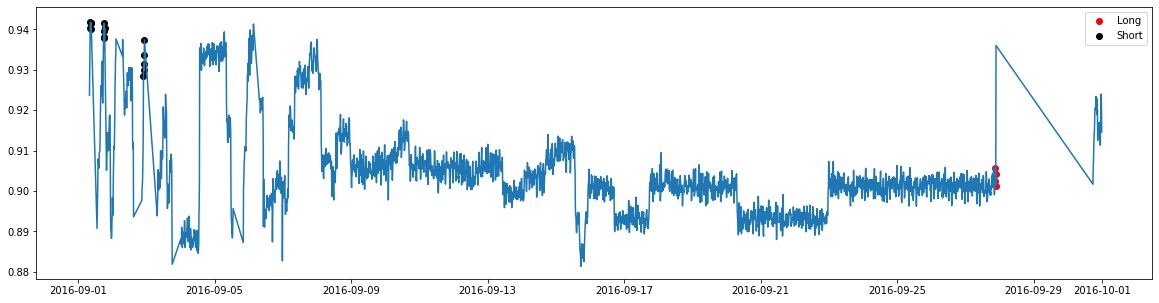

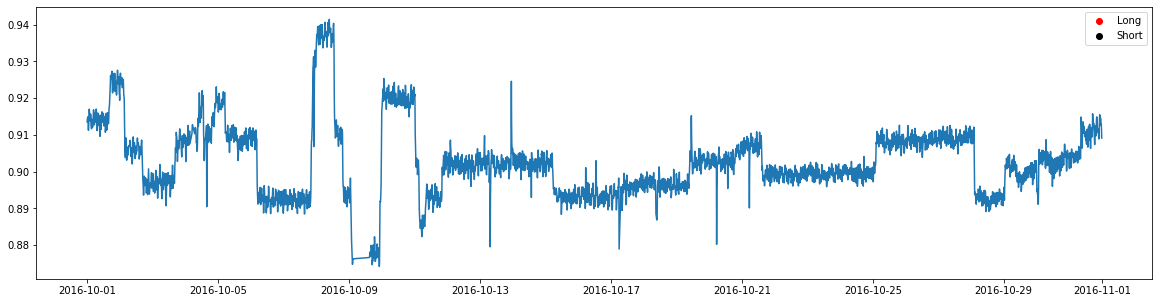

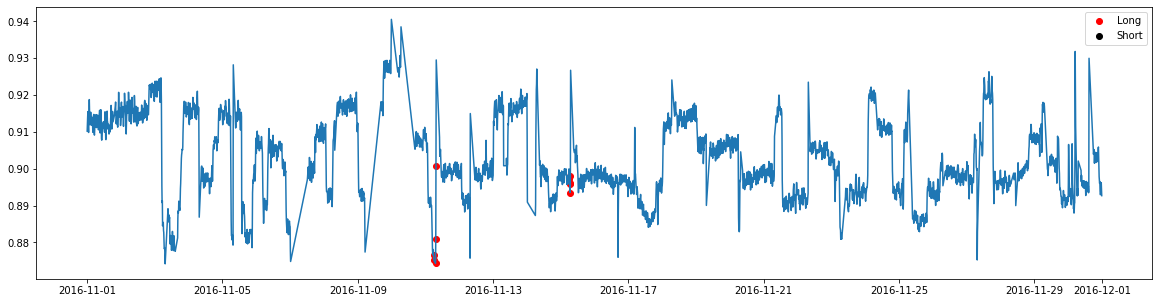

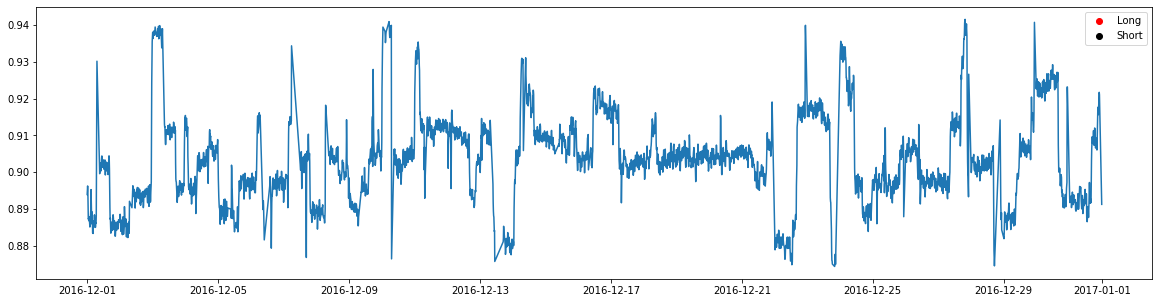

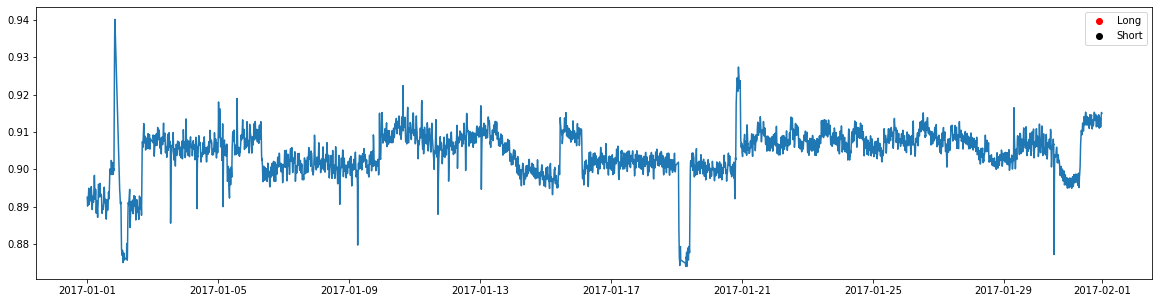

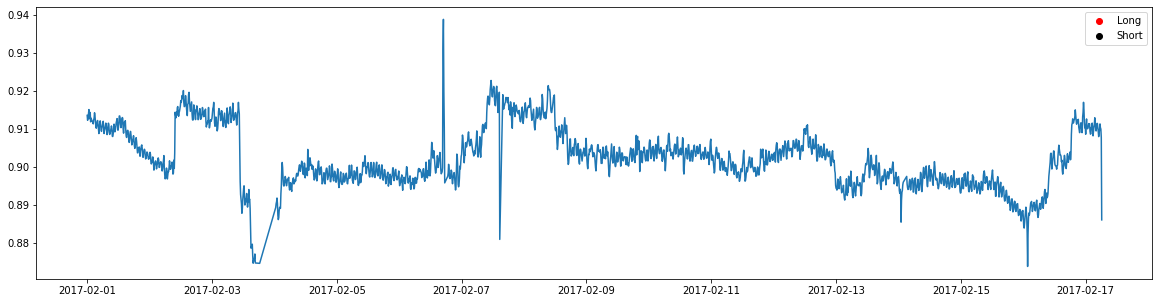

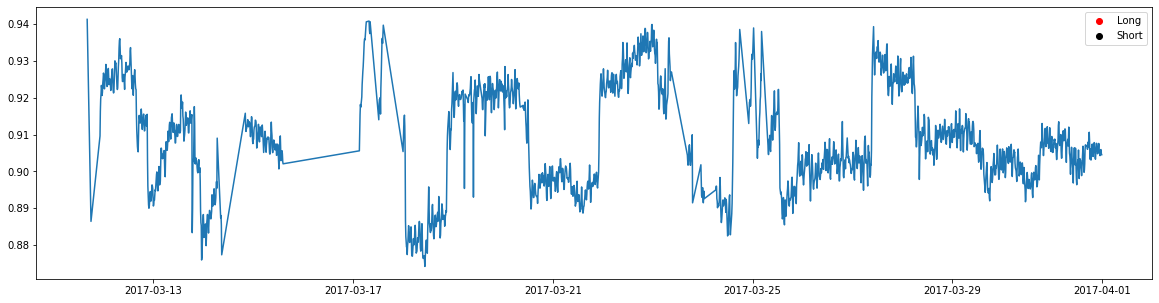

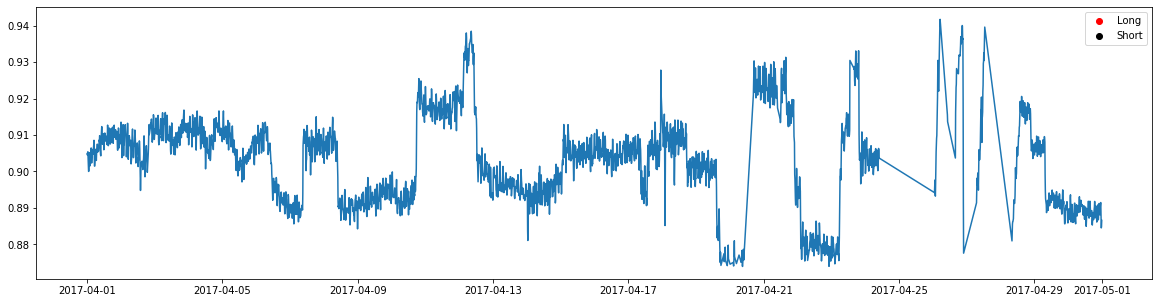

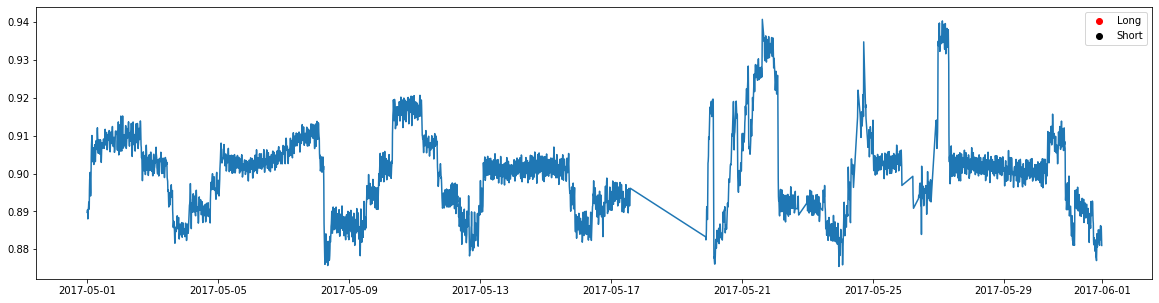

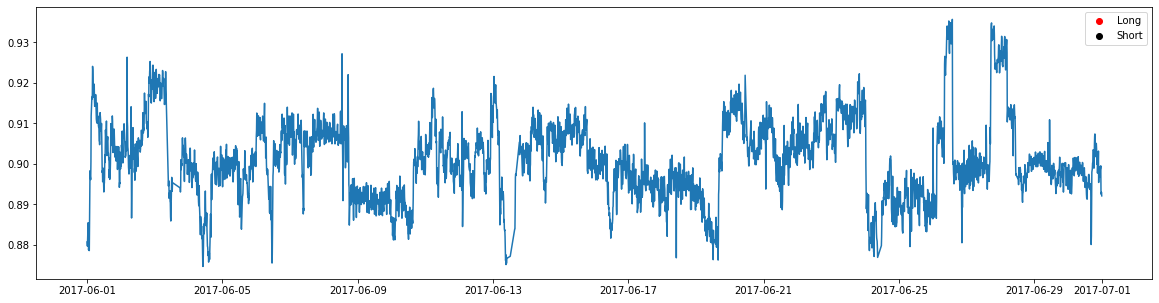

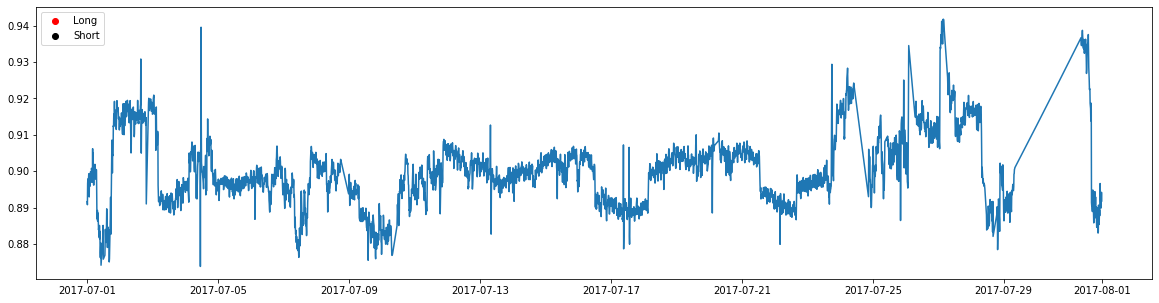

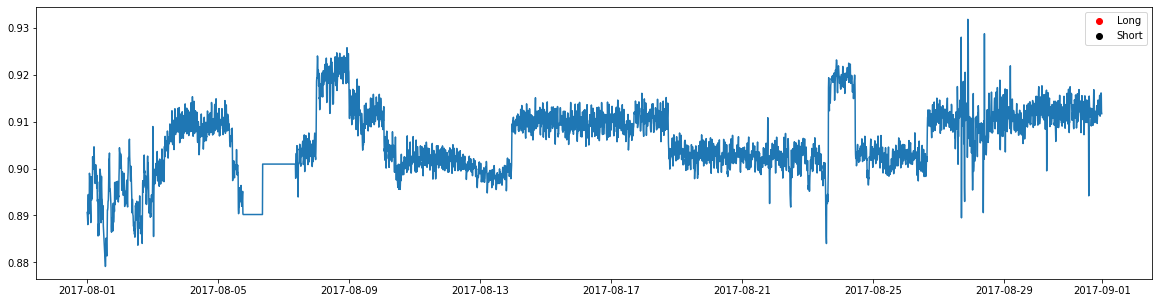

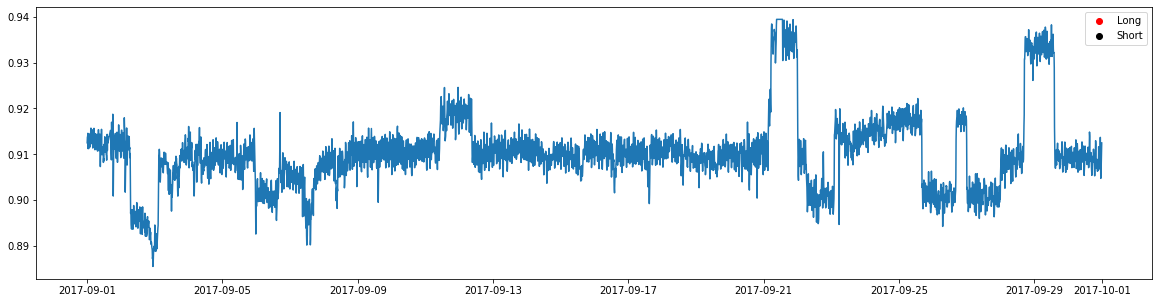

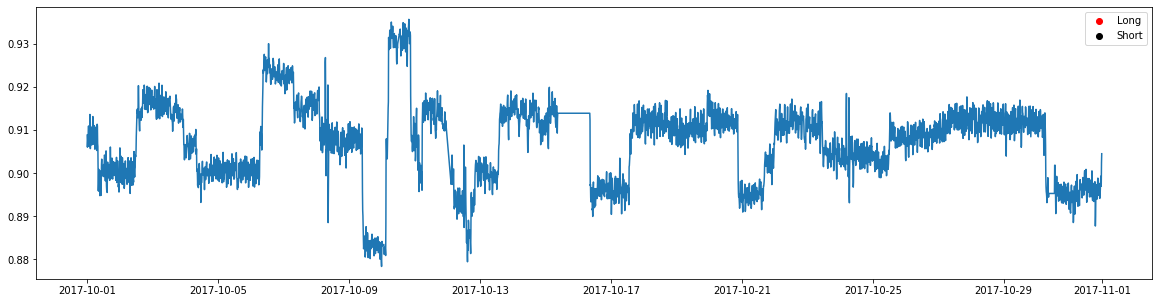

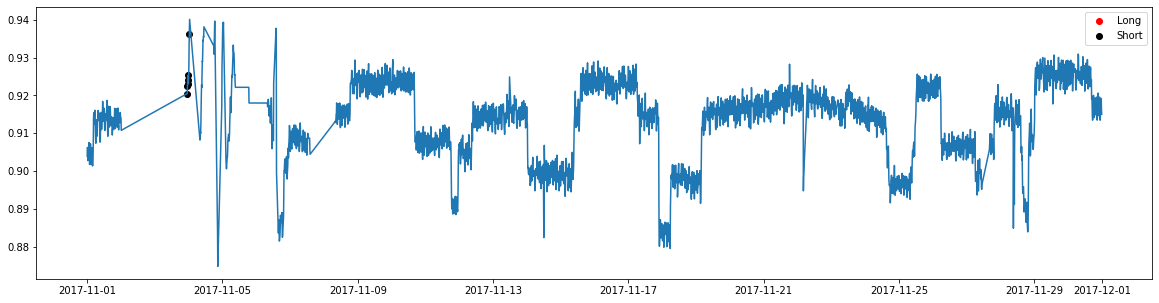

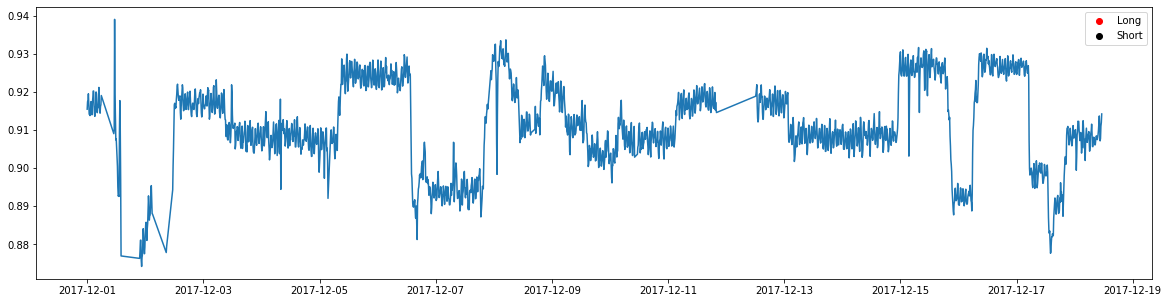

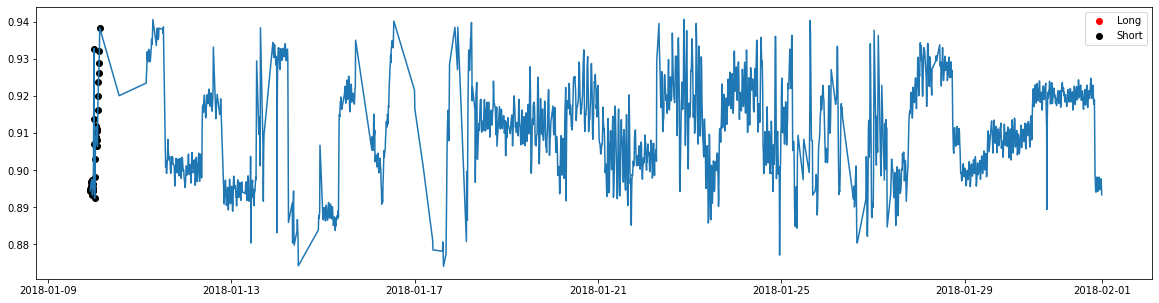

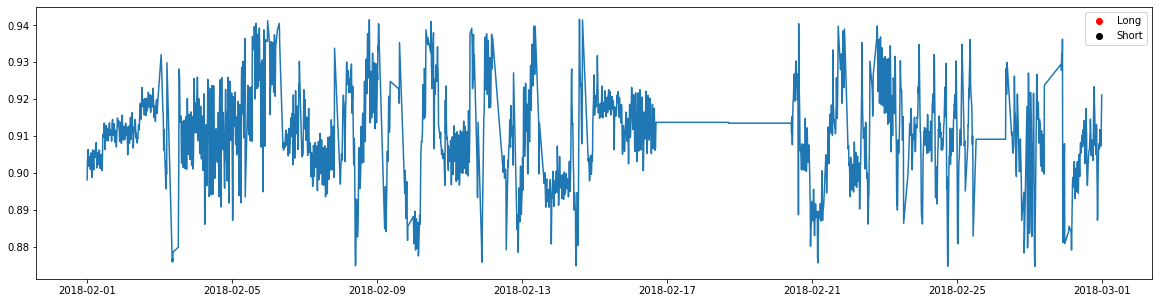

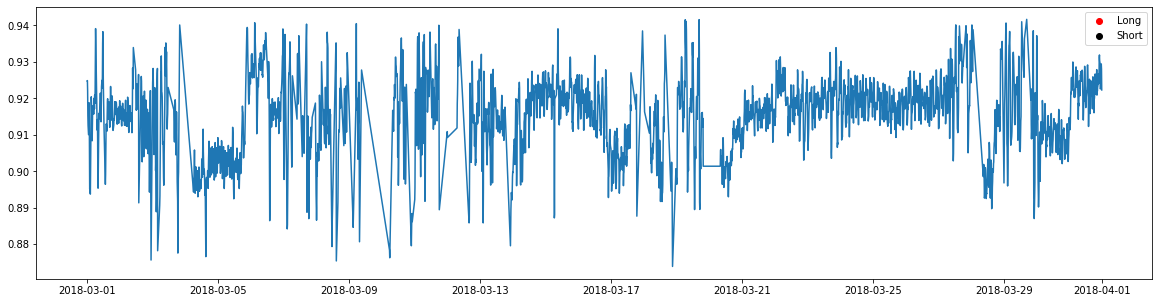

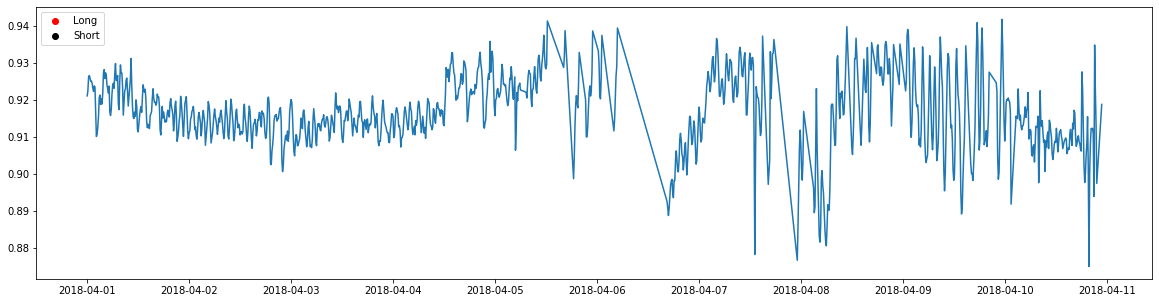

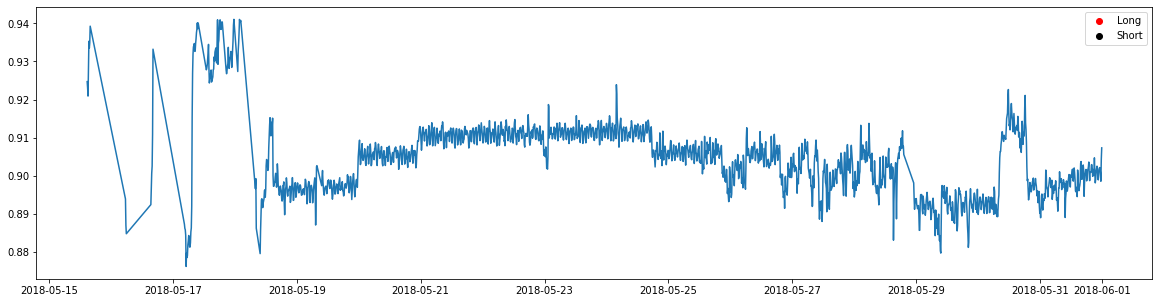

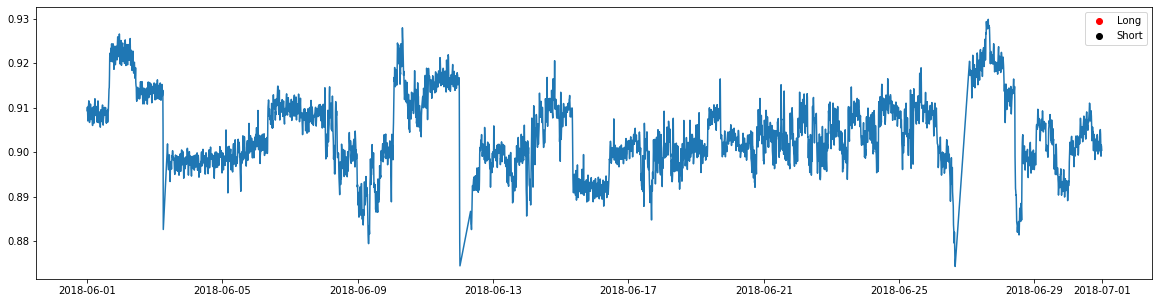

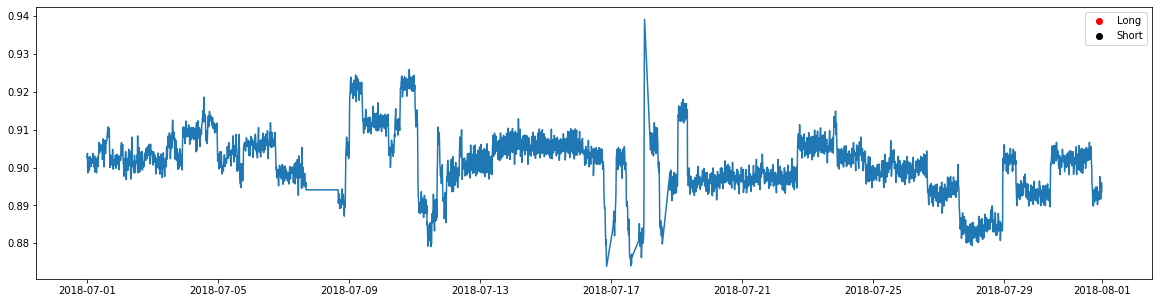

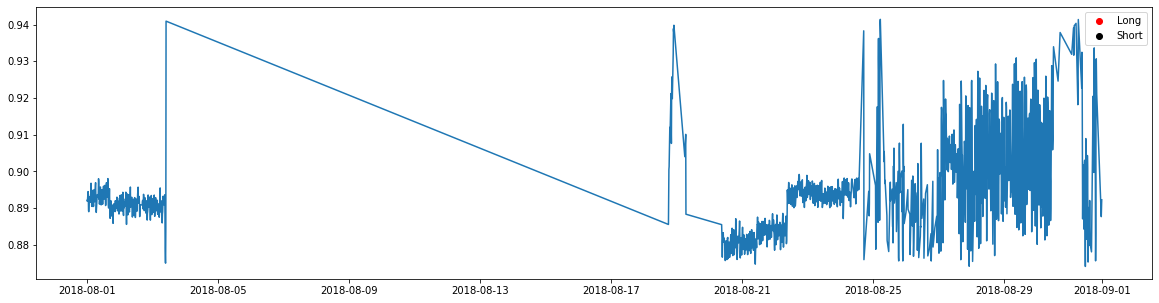

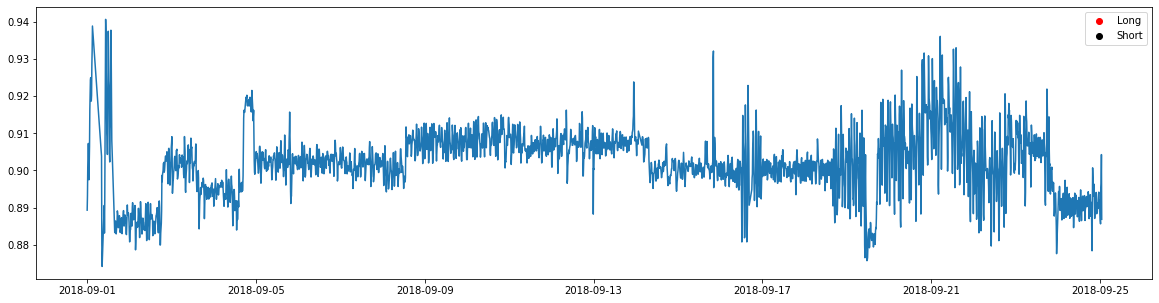

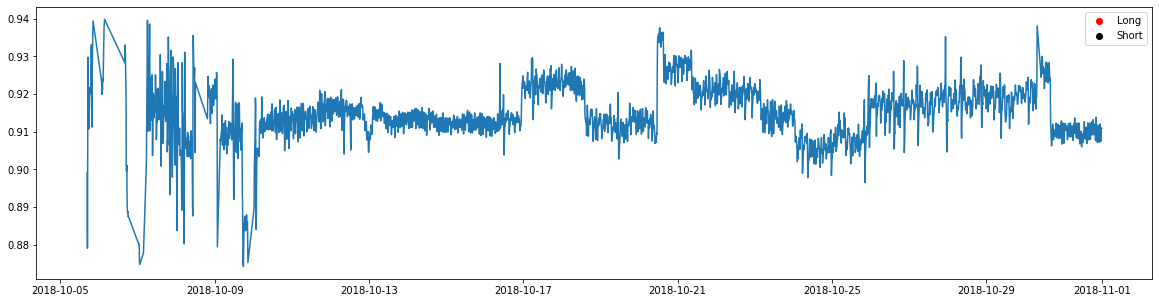

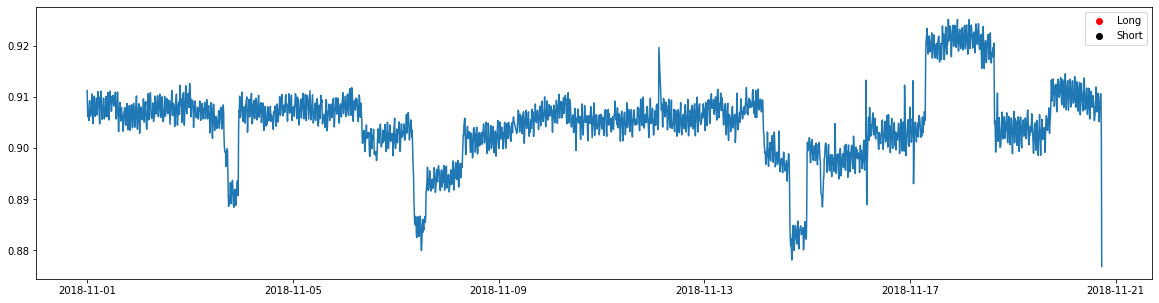

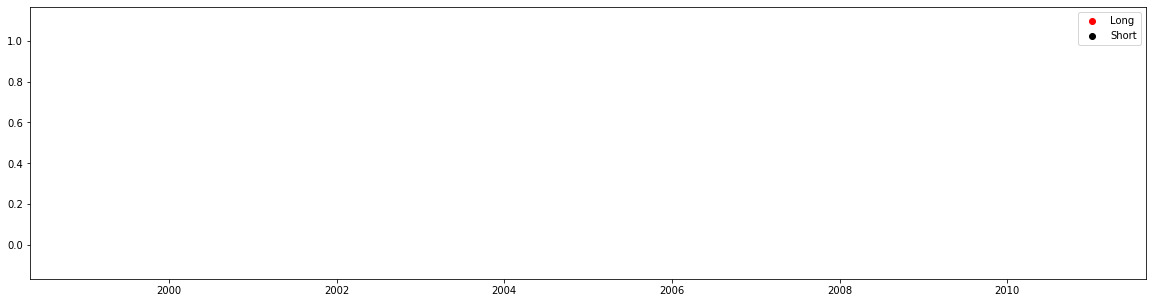

In [57]:
for i in ['2016','2017','2018']:
    for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        try:
            date = i+'-'+j
            plot_trend(date)
        except:
            pass